<a href="https://colab.research.google.com/github/Shreedevi-Byahatti/Class-84/blob/main/Project_1_ML_Predict_Weight_by_Height.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please watch the explainer video : https://drive.google.com/file/d/1w0-EwKUPtUP6r3xrwP6NmoYI5u_74s4m/view

## So a very big problem has arrived in your school. Every year the school maintains the height and weight data of it's students. But something very shocking happened this year the data of weight of this year's students has got lost.
## It is a really serious problem. The teacher who has to maintain the data is in deep trouble. You have been called to sort it out.
## You came forward to help your teacher and said that as we have data of heights and we have data of previous year students so let's apply machine learning and predict the weight of the students.

<h2 style="color:blue" align="left"> Read Data </h2>

Download and save Dataset folder in your drive to access the dataset : https://drive.google.com/drive/folders/1CPj9J_BGbwihE5TUr2M8jOJu6i0TvNAy?usp=sharing

In [ ]:
# We need to import all these libraries to import the data.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# How can you import the data from drive ?

df = pd.read_csv("/content/drive/MyDrive/Dataset/weight-height.csv", index_col=0)


In [ ]:
# How can you show the sample data ?

df.head()

,Height(Inches),Weight(Pounds)
Gender,,
Male,73.847017,241.893563
Male,68.781904,162.310473
Male,74.110105,212.740856
Male,71.730978,220.042470
Male,69.881796,206.349801


In [ ]:
df.tail()

,Height(Inches),Weight(Pounds)
Gender,,
Female,66.172652,136.777454
Female,67.067155,170.867906
Female,63.867992,128.475319
Female,69.034243,163.852461
Female,61.944246,113.649103


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, Male to Female
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  9997 non-null   float64
 1   Weight(Pounds)  9997 non-null   float64
dtypes: float64(2)
memory usage: 234.4+ KB


In [ ]:
# How to find the number of rows and columns in the previous data of students ?

df.shape

(10000, 2)

In [ ]:
# How to describe the data it's count, mean, min and max ?

df.describe()

,Height(Inches),Weight(Pounds)
count,9997.000000,9997.000000
mean,66.366724,161.433664
std,3.847752,32.110873
min,54.263133,64.700127
25%,63.504799,135.814924
50%,66.317755,161.193433
75%,69.173577,187.187094
max,78.998742,269.989699


<h2 style="color:blue" align="left"> EDA(Exploratory Data Analysis) </h2>
<h4> Before doing anything else with data we need to analyze it. We need to also explain the data which is also called as Exploratory Data Analysis


A new problem arrived that the data is in inches and pounds whereas we need it in cm and kg. How can we do it change the heading of the columns as well as change the data ?

In [ ]:
df.rename(columns={
    'Height(Inches)':'Height',
    'Weight(Pounds)':'Weight',
}, inplace=True)

df.columns

Index(['Height', 'Weight'], dtype='object')

### Ask the students does he know about units where we have same unit for weight which are kilogram and pounds. Similarly we can change inches to cm. And how can we do it ?
### If student doesn't know make him google it himself.

In [ ]:
df['Height'] = df['Height']*(0.0254) # To convert inches to cm we need to multiply it by 0.0254
df['Weight'] = df['Weight']/2.205 # To convert pound to kg we need to divide it by 2.205

In [ ]:
df.head()

,Height,Weight
Gender,,
Male,1.875714,109.702296
Male,1.747060,73.610192
Male,1.882397,96.481114
Male,1.821967,99.792504
Male,1.774998,93.582676


How can we make a scatter graph which will show the height and weight of students ?

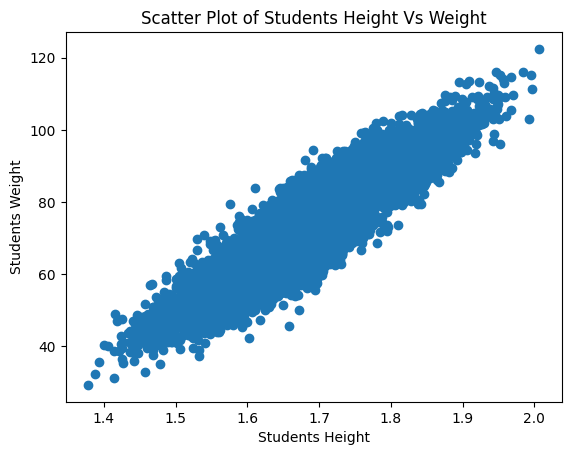

In [ ]:
plt.scatter(x =df.Height, y=df.Weight)
plt.xlabel("Students Height")
plt.ylabel("Students Weight")
plt.title("Scatter Plot of Students Height Vs Weight")
plt.show()

#### Making the same scatter graph with seaborn for more clarity and bigger shape ?

<Axes: xlabel='Height', ylabel='Weight'>

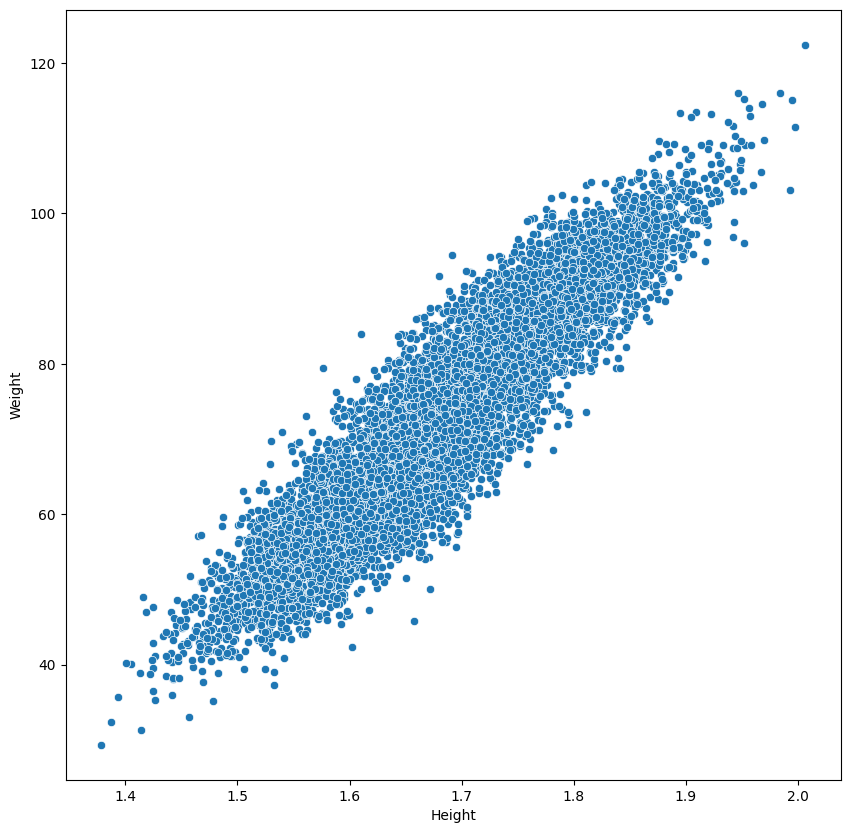

In [ ]:

plt.figure(figsize=(10, 10))
sns.scatterplot(x=df['Height'], y=df['Weight'])

# Can you see a clear trend ?

### So we can see a clear trend that when someone's height increases his weight also increases.

How to make a bar graph to find the number of students with different heights ?

Text(0, 0.5, 'Count')

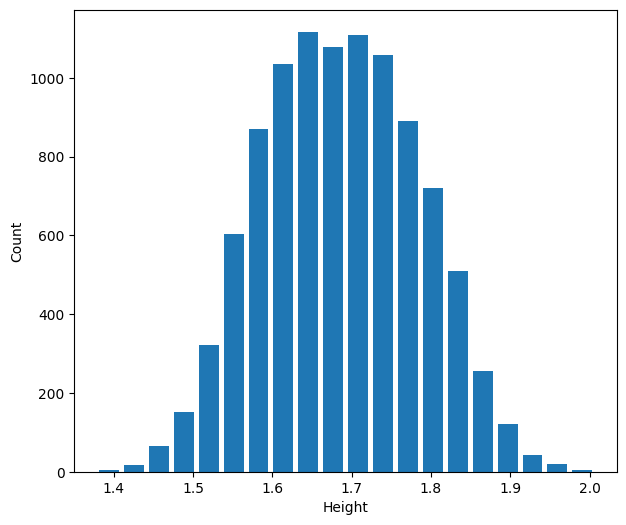

In [ ]:
plt.figure(figsize=(7,6))
plt.hist(df['Height'], bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')

How to make a bar graph to find the number of students with different weights ?

Text(0, 0.5, 'Count')

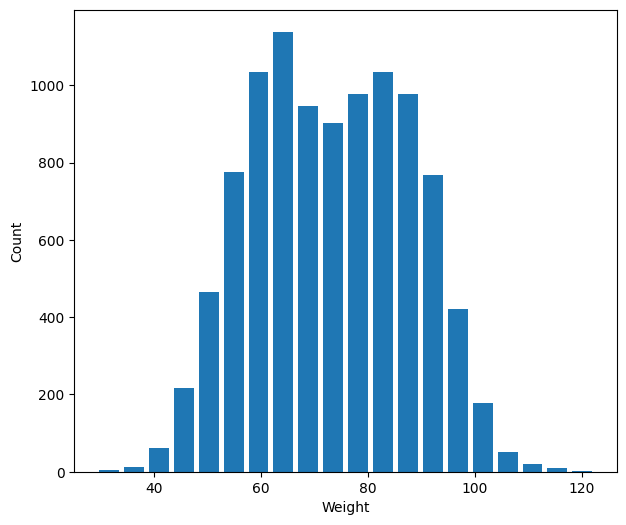

In [ ]:
plt.figure(figsize=(7,6))
plt.hist(df['Weight'], bins=20, rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')

# **End of Session 1 **



---



---



# **Start of Session 2 **

# Data Cleaning

Now there was something more unanticipated came up the data for few previous student was missing. How to find number of students whose height or weight data is missing ?

In [ ]:
df.isnull().sum()

Height    3
Weight    3
dtype: int64

There could be different approaches to solve this problem one of the best one is to find the mean of all other data and put the mean of their height or weight to those positions accordingly.

In [ ]:
df.mean()

Height     1.685715
Weight    73.212546
dtype: float64

In [ ]:
df2 = df.fillna(df.mean())

In [ ]:
df2.isnull().sum() # Now we can see all datas are filled.

Height    0
Weight    0
dtype: int64

In [ ]:
df2.head()

,Height,Weight
Gender,,
Male,1.875714,109.702296
Male,1.747060,73.610192
Male,1.882397,96.481114
Male,1.821967,99.792504
Male,1.774998,93.582676


## Split Data

###  We have to now train the data. So for that we are going to make two differnt dataframes.


*   The first one which will only comprise of the height in that we will drop the weight.
*   The second one which will only comprise of the weight in that we will drop the height.



In [ ]:
X = df2.drop("Weight", axis = "columns")
y = df2.drop("Height", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (10000, 1)
shape of y =  (10000, 1)


### Whenever we train a machine learning model what we do is that we divide the data in 2 parts. The data which will be used to test and the data and the other which will be used to train. So both height and weight which are X and y respectively they are divided into parts.
### Now there is another term which is test_size so this explains what part of data will be used to train and which will go for test. Here test size comprises of 0.2 it means 0.2/1 = 1/5 so which is one fifth part so we have 10000 rows among which 2000 will go for test rest 8000 will go for train.  

In [ ]:
from sklearn.model_selection import train_test_split # sklearn in full form known as scikit learn is a library which contains different algorithms to train the data.

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2) # train_test_split is the function which divides it in 4 parts.

print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (8000, 1)
shape of y_train =  (8000, 1)
shape of X_test =  (2000, 1)
shape of y_test =  (2000, 1)


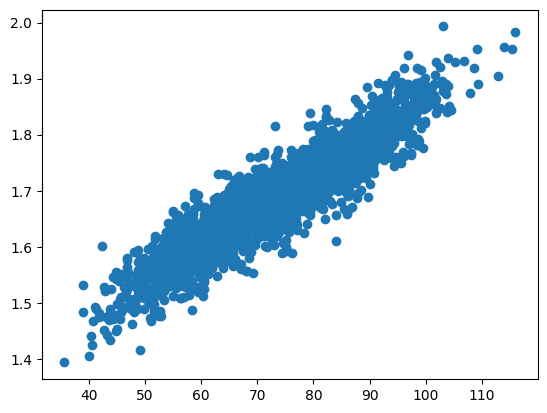

In [ ]:
plt.scatter(y_test,X_test) # Let's make a graph again to check if we are able to see the data which we are going to use to train is correct.

## Select a model and train it.


In [ ]:
from sklearn.linear_model import LinearRegression # Now let's import Linear regression from scikit learn.
 lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train) # Train the model

LinearRegression()

Simple Linear Regression is a type of Regression algorithms that models the relationship between a dependent variable and a single independent variable. The relationship shown by a Simple Linear Regression model is linear or a sloped straight line, hence it is called Simple Linear Regression.

The key point in Simple Linear Regression is that the dependent variable must be a continuous/real value.

However, the independent variable can be measured on continuous or categorical values.

Simple Linear regression algorithm has mainly two objectives:

1. Model the relationship between the two variables. Such as the relationship between Income and expenditure, experience and Salary, etc.

2. Forecasting new observations. Such as Weather forecasting according to temperature, Revenue of a company according to the investments in a year, etc.



The equation of the line is defined by ' y = m * x + c '. For the students who didn't understand it's just a formula.
c is called intercept.
m is called coefficient.
We'll find the value of c and m by linear regression algorithm.


In [ ]:
# Coefficient

lr.coef_

array([[137.90901625]])

In [ ]:
# Intercept

lr.intercept_

array([-159.25806237])

In [ ]:
height = int(input("Enter the value of height to get it's estimated weight ?"))

m = lr.coef_
c = lr.intercept_
x = height
y = m * x + c
y

Enter the value of height to get it's estimated weight ?234


array([[32111.45173941]])

In [ ]:
# Let's make another dataset y_pred which will save all the predicted data.

y_pred  = lr.predict(X_test)
y_pred

array([[80.9847599 ],
       [67.79247019],
       [74.99485406],
       ...,
       [71.51756538],
       [80.20648089],
       [86.36135471]])

In [ ]:
# Let's compare our data which we have predicted and the one which saved for the test cases.
# Compare the weight and and weight_predicted we can see that they are nearly same. Obviously they are not very correct but still we are getting nearby estimates.

pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["height", "weight", "weight_predicted"])

,height,weight,weight_predicted
0,1.742039,75.196314,80.984760
1,1.646379,68.704575,67.792470
2,1.698605,68.298333,74.994854
3,1.467226,40.721088,43.085649
4,1.511234,56.962027,49.154747
...,...,...,...
1995,1.793081,98.704830,88.023928
1996,1.724528,80.874030,78.569929
1997,1.673390,62.992192,71.517565
1998,1.736395,85.617309,80.206481


In [ ]:
lr.score(X_test,y_test) # Let's check how good our model is by checking our score.

0.8569787301619118

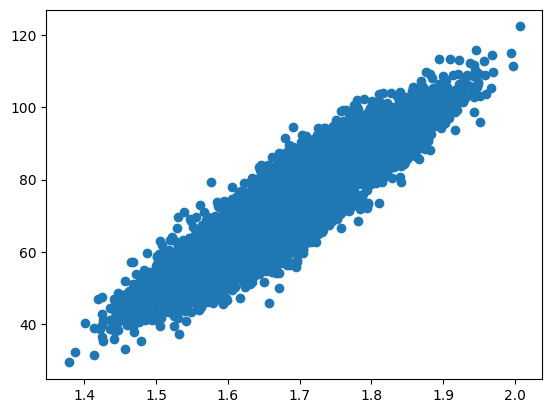

In [ ]:
plt.scatter(X_train,y_train)

Let's see our solution in perspective of graphs.
So we'll create two graphs.
1. The scatter graph of test values.
2. The line graph by which we are predicting how the data will be predicted on the basis of values.


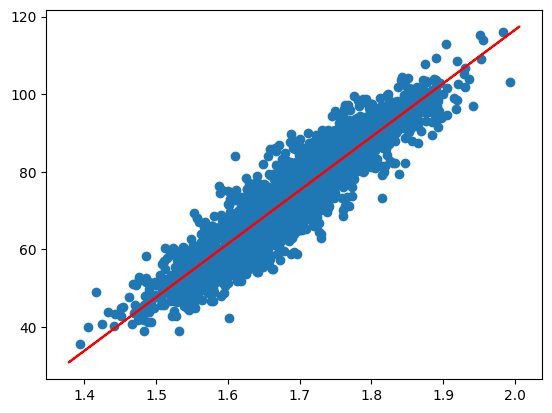

In [ ]:
# Values we got from our model on basis of x_train and saved it in y_train
y_train = lr.predict(X_train)

# First graph
plt.scatter(X_test, y_test)

# Second line graph by predicted values.
plt.plot(X_train, y_train, color = "r")

# Save ML Model

In [ ]:
# We can also save the model which we have created.

import joblib
joblib.dump(lr, "student_weight_predictor.pkl")

['student_weight_predictor.pkl']

In [ ]:
# Load the model and save it in a a variable named as model.
model = joblib.load("student_weight_predictor.pkl")

In [ ]:
# We can find the values by creating

height = int(input("Enter the value of height to get it's estimated weight ?"))

model.predict([[height]])[0][0]

Enter the value of height to get it's estimated weight ?23


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3012.6493113123443